In [0]:
import pandas as pd
import math as voodoo_mama_juju

A search query “Word1 Word2” is being scored against the following documents (see table). The document corpus (as shown in the table) only contains five documents. The number of times the words “Word1” and “Word2” appear in each of the documents is given in the table. The length of each document is also given. Assume k = 1.2 and b = 0.75. Write a (Python preferably) program to calculate the BM25 score for the query against all the documents and rank the documents by their BM25 score. Your program should read the table from a file, i.e. do not hardcode these values into your program. You may hardcode the values of k and b, but compute IDF, DF, TF, N, L, etc. using the data you read from the text file, at runtime. The scores you will obtain will range from -2.3 to -4.8. Note: You may get negative scores because of N being close to DF - you can read more here.

In [0]:
data = {'DocumentL':[50,80,20,200,10], 
        'FrequencyOfWord1':[0,56,45,89,76],
        'FrequencyOfWord2':[78,6,89,23,0]}

In [0]:
table = pd.DataFrame(data)
table.index = ['doc1','doc2','doc3','doc4','doc5']

In [16]:
print(table)

      DocumentL  FrequencyOfWord1  FrequencyOfWord2
doc1         50                 0                78
doc2         80                56                 6
doc3         20                45                89
doc4        200                89                23
doc5         10                76                 0




---

### Hardcode k1 & b

---



In [0]:
k = 1.2
b = 0.75



---

### Compute IDF

---

Inverse Document Frequency (IDF), as per wikipedia, IDF is obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient.

---




In [0]:
N = table.shape[0]
nqi_w1 = (table['FrequencyOfWord1'] != 0).sum() 
nqi_w2 = (table['FrequencyOfWord2'] != 0).sum()

def IDF(N,nqi):
  return voodoo_mama_juju.log((N - nqi + 0.5) / (nqi + 0.5))

computed_IDF_w1 = IDF(N,nqi_w1)
computed_IDF_w2 = IDF(N,nqi_w2)
IDFqi = computed_IDF_w1 + computed_IDF_w2



---

### Compute BM25

---



In [9]:
from google.colab import files
BM25_algorithm = files.upload()

Saving BM25_score.PNG to BM25_score.PNG


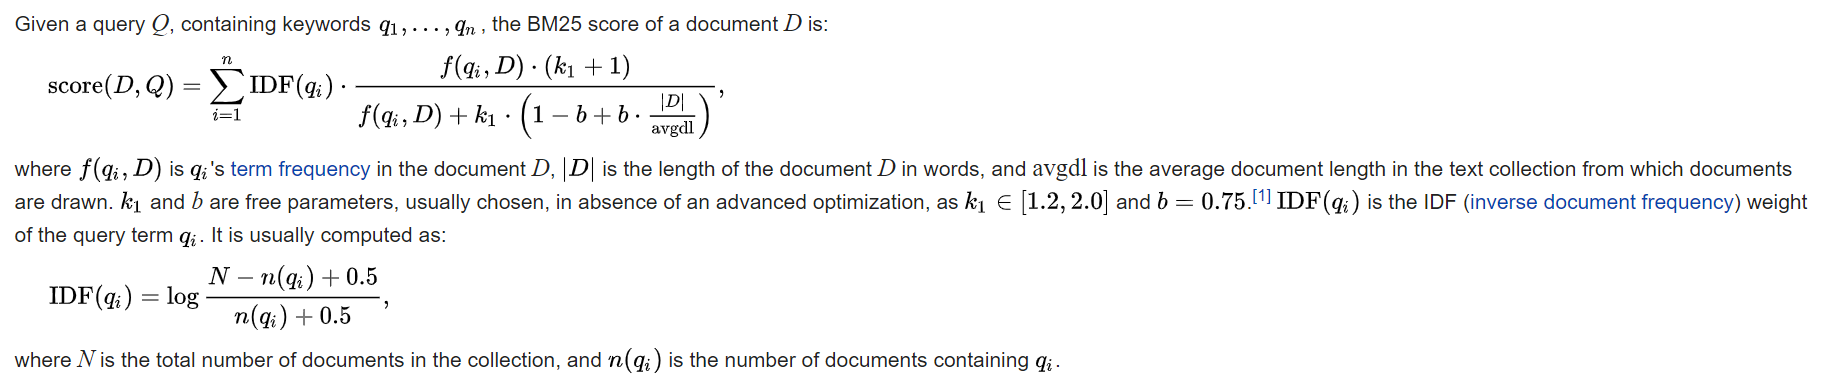

In [19]:
from IPython.display import Image
Image('BM25_score.PNG')

In [0]:
def BM25(k,b,fqiD,avgdl,D,IDFqi):
  return (IDFqi * ((fqiD * (k + 1)) / (fqiD + k * (1 - b + b * (D / avgdl))))) 

In [0]:
fqiD1w1 = table.at['doc1','FrequencyOfWord1']
fqiD2w1 = table.at['doc2','FrequencyOfWord1']
fqiD3w1 = table.at['doc3','FrequencyOfWord1']
fqiD4w1 = table.at['doc4','FrequencyOfWord1']
fqiD5w1 = table.at['doc5','FrequencyOfWord1']

fqiD1w2 = table.at['doc1','FrequencyOfWord2']
fqiD2w2 = table.at['doc2','FrequencyOfWord2']
fqiD3w2 = table.at['doc3','FrequencyOfWord2']
fqiD4w2 = table.at['doc4','FrequencyOfWord2']
fqiD5w2 = table.at['doc5','FrequencyOfWord2']

D1 = table.at['doc1','DocumentL']
D2 = table.at['doc2','DocumentL']
D3 = table.at['doc3','DocumentL']
D4 = table.at['doc4','DocumentL']
D5 = table.at['doc5','DocumentL']

avgdl = (D1 + D2 + D3 + D4 + D5) / table.shape[0]

In [27]:
BM25_doc1_W1 = BM25(k,b,fqiD1w1,avgdl,D1,IDFqi)
print(BM25_doc1_W1)

BM25_doc2_W1 = BM25(k,b,fqiD2w1,avgdl,D2,IDFqi)
print(BM25_doc2_W1)

BM25_doc3_W1 = BM25(k,b,fqiD3w1,avgdl,D3,IDFqi)
print(BM25_doc3_W1)

BM25_doc4_W1 = BM25(k,b,fqiD4w1,avgdl,D4,IDFqi)
print(BM25_doc4_W1)

BM25_doc5_W1 = BM25(k,b,fqiD5w1,avgdl,D5,IDFqi)
print(BM25_doc5_W1)

-0.0
-4.724224571166183
-4.775526523738436
-4.686455035320608
-4.80701274884679


In [28]:
BM25_doc1_W2 = BM25(k,b,fqiD1w2,avgdl,D1,IDFqi)
print(BM25_doc1_W2)

BM25_doc2_W2 = BM25(k,b,fqiD2w2,avgdl,D2,IDFqi)
print(BM25_doc2_W2)

BM25_doc3_W2 = BM25(k,b,fqiD3w2,avgdl,D3,IDFqi)
print(BM25_doc3_W2)

BM25_doc4_W2 = BM25(k,b,fqiD4w2,avgdl,D4,IDFqi)
print(BM25_doc4_W2)

BM25_doc5_W2 = BM25(k,b,fqiD5w2,avgdl,D5,IDFqi)
print(BM25_doc5_W2)

-4.777240892884325
-3.9730636192928905
-4.804205161836201
-4.309285411364834
-0.0
